In [9]:
from jax import jit, lax
import jax.numpy as np

def euler_step(y, t, t_delta, f, args):
    return y + t_delta * f(y, t, *args)

def midpoint_step(y, t, t_delta, f, args):
    mid_point = y + 0.5 * t_delta * f(y, t, *args)
    return y + t_delta * f(mid_point, t + 0.5 * t_delta, *args)

def integrate(f, y0, ts, dt, method, args=()):
    ts = np.array(ts)

    @jit
    def scan_fun(carry, next_t):
        curr_t, curr_y = carry
        t_delta = next_t - curr_t
        if method == 'euler':
            next_y = euler_step(curr_y, curr_t, t_delta, f, args)
        elif method == 'midpoint':
            next_y = midpoint_step(curr_y, curr_t, t_delta, f, args)
        else:
            raise ValueError("Invalid method")
        return (next_t, next_y), next_y

    init_carry = (ts[0], y0)
    _, ys = lax.scan(scan_fun, init_carry, ts[1:])
    return np.concatenate((y0[None], ys))

def odeint_euler(f, y0, ts, args=(), dt=1e-6):
    return integrate(f, y0, ts, dt, 'euler', args)

def odeint_midpoint(f, y0, ts, args=(), dt=1e-6):
    return integrate(f, y0, ts, dt, 'midpoint', args)

def odeint(f, y0, ts, args=(), dt=1e-6, method='midpoint'):
    if method == 'euler':
        return odeint_euler(f, y0, ts, args, dt)
    elif method == 'midpoint':
        return odeint_midpoint(f, y0, ts, args, dt)
    else:
        raise ValueError("Invalid method")


# Example usage
def example_ode(y, t, *args):
    # Define your ODE here
    return -y

y0 = np.array([1.])  # initial condition
ts = np.linspace(0, 10, 100)  # time points

result_euler = odeint_euler(example_ode, y0, ts)
result_midpoint = odeint_midpoint(example_ode, y0, ts)

print(result_euler)



[[1.00000000e+00]
 [8.98989916e-01]
 [8.08182836e-01]
 [7.26548195e-01]
 [6.53159499e-01]
 [5.87183774e-01]
 [5.27872264e-01]
 [4.74551857e-01]
 [4.26617324e-01]
 [3.83524686e-01]
 [3.44784826e-01]
 [3.09958071e-01]
 [2.78649151e-01]
 [2.50502765e-01]
 [2.25199461e-01]
 [2.02452049e-01]
 [1.82002351e-01]
 [1.63618281e-01]
 [1.47091180e-01]
 [1.32233486e-01]
 [1.18876569e-01]
 [1.06868833e-01]
 [9.60740000e-02]
 [8.63695592e-02]
 [7.76453391e-02]
 [6.98023736e-02]
 [6.27516285e-02]
 [5.64130805e-02]
 [5.07147908e-02]
 [4.55920845e-02]
 [4.09868248e-02]
 [3.68467420e-02]
 [3.31248492e-02]
 [2.97789052e-02]
 [2.67709363e-02]
 [2.40668021e-02]
 [2.16358118e-02]
 [1.94503758e-02]
 [1.74856912e-02]
 [1.57194603e-02]
 [1.41316364e-02]
 [1.27041955e-02]
 [1.14209466e-02]
 [1.02673126e-02]
 [9.23021324e-03]
 [8.29786621e-03]
 [7.45970011e-03]
 [6.70619356e-03]
 [6.02879887e-03]
 [5.41983079e-03]
 [4.87237191e-03]
 [4.38021449e-03]
 [3.93776782e-03]
 [3.54001438e-03]
 [3.18243634e-03]
 [2.860978

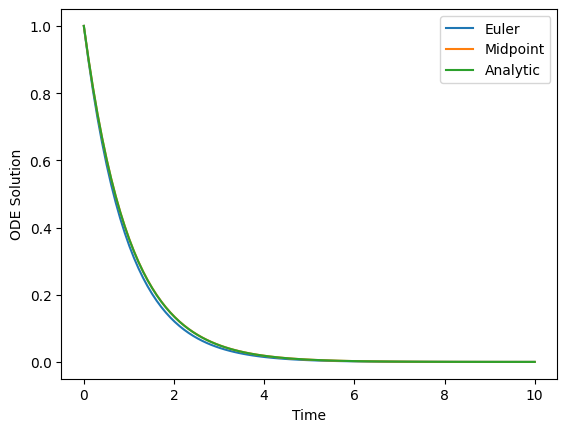

In [12]:
import matplotlib.pyplot as plt

# Plotting the ODE results
plt.plot(ts, result_euler, label='Euler')
plt.plot(ts, result_midpoint, label='Midpoint')
plt.plot(ts, np.exp(-ts), label='Analytic')
plt.xlabel('Time')
plt.ylabel('ODE Solution')
plt.legend()
plt.show()


